## Introduction
We seek to analyse funding received by startups in India. The aim is to prescribe the best course of action for a startup looking into the Indian business ecosystem.

In [1]:
import pyodbc 
import numpy as np
from dotenv import dotenv_values
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import squarify
import warnings 

warnings.filterwarnings('ignore')

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
# Use the connect method of the pyodbc library and pass in the connection string this will connect to the server.

connection = pyodbc.connect(connection_string)

## DATA LOADING

### 2018, 2019, 2020, 2021 Data Loading

In [4]:
data18= pd.read_csv('startup_funding2018.csv')

data19=pd.read_csv('startup_funding2019.csv')

fetch20 = 'Select * from dbo.LP1_startup_funding2020'
data20 = pd.read_sql(fetch20, connection)

fetch21 = 'Select * from dbo.LP1_startup_funding2021'
data21 = pd.read_sql(fetch21, connection)

# #checking the shape of each file
print(data18.shape,data19.shape,data20.shape,data21.shape)


(526, 6) (89, 9) (1055, 10) (1209, 9)


## DATA CLEANING 

### Create uniform title names to each column

In [5]:
data19.rename(columns={
    'Company/Brand':'Company_Brand',
    'What it does':'What_it_does',
}, inplace=True)

data20.rename(columns={
    'Amount':'Amount($)',
}, inplace=True)

data21.rename(columns={
    'Amount':'Amount($)',
}, inplace=True)

data18.rename(columns={
    'Amount':'Amount($)',
}, inplace=True)

data18.rename(columns={
    'Company Name':'Company_Brand',
    'Industry':'Sector',
    'About Company':'What_it_does',
    'Amount':'Amount($)',
    'Location':'HeadQuarter',
    'Round/Series':'Stage',
}, inplace=True)

Adding Column year in all datasets

In [6]:
data18['Year'] = '2018'
data19['Year'] = '2019'
data20['Year'] = '2020'
data21['Year'] = '2021'

Deleting of unnecessary columns

In [7]:
columns_to_drop2 = ['Founded','Founders','Investor']
data19 = data19.drop(columns_to_drop2, axis=1)

columns_to_drop3 = ['Founded','Founders','Investor','column10']
data20 = data20.drop(columns_to_drop3, axis=1)


VIEWING ALL DATA HEADS

In [8]:
data18.head(1)

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018


In [9]:
data19.head(1)

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount($),Stage,Year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,"$6,300,000",NaN,2019


In [10]:
data20.head(1)

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount($),Stage,Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,None,2020


In [11]:
data21.head(1)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021


### CLEANING 2018 DATA

Overview of the Data

In [12]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  526 non-null    object
 1   Sector         526 non-null    object
 2   Stage          526 non-null    object
 3   Amount($)      526 non-null    object
 4   HeadQuarter    526 non-null    object
 5   What_it_does   526 non-null    object
 6   Year           526 non-null    object
dtypes: object(7)
memory usage: 28.9+ KB


In [13]:
data18.head(10)

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,2018
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,2018
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,2018


In [14]:
# Check missing values in the dataset
data18.isna().sum()

Company_Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
What_it_does     0
Year             0
dtype: int64

1. Amount Column

In [15]:
data18['Amount($)'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [16]:
# Missing Values are also denoted by dashes ("—")
# drop dashes with NaN
value_to_drop = '—'
data18 = data18[data18['Amount($)'] != value_to_drop]

# Remove any comma
data18['Amount($)'] = data18['Amount($)'].astype(str).str.replace(',', '')

# Remove any $ symbol
data18['Amount($)'] = data18['Amount($)'].astype(str).str.replace('$', '')


# Standardise the amount column by multiplying INR('₹') values by 0.0147
# (Average currency rate INR to USD in 2018) Exchange Rates UK
data18.loc[data18['Amount($)'].astype(str).str.contains('₹'), 
'Amount($)'] = data18.loc[data18['Amount($)'].astype(str).str.contains('₹'), 
'Amount($)'].apply(lambda x: float(x.replace('₹', ''))*0.0147)

# Convert amounts with no currency symbol to USD using exchange rate of 1 USD = 1 USD
data18.loc[~data18['Amount($)'].astype(str).str.contains('₹'), 
'Amount($)'] = data18.loc[~data18['Amount($)'].astype(str).str.contains('₹'), 
'Amount($)'].apply(lambda x: float(x))

# Convert Amount($) column from object to float datatype
data18['Amount($)'] = data18['Amount($)'].astype(float)

In [17]:
data18['Amount($)'].unique()

array([2.500000e+05, 5.880000e+05, 9.555000e+05, 2.000000e+06,
       1.600000e+06, 2.352000e+05, 7.350000e+05, 1.470000e+06,
       1.500000e+05, 1.100000e+06, 7.350000e+03, 6.000000e+06,
       6.500000e+05, 5.145000e+05, 9.408000e+05, 2.940000e+05,
       1.000000e+06, 5.000000e+06, 4.000000e+06, 4.410000e+05,
       2.800000e+06, 1.700000e+06, 1.300000e+06, 7.350000e+04,
       1.837500e+05, 2.205000e+05, 5.000000e+05, 1.528800e+06,
       6.615000e+05, 1.340000e+07, 3.675000e+05, 3.880800e+05,
       1.176000e+05, 8.820000e+02, 9.000000e+06, 1.000000e+05,
       2.000000e+04, 1.200000e+05, 4.998000e+05, 5.027400e+06,
       1.431450e+05, 8.820000e+06, 7.420000e+08, 1.470000e+07,
       2.940000e+07, 3.980000e+06, 1.000000e+04, 1.470000e+03,
       3.675000e+06, 1.000000e+09, 7.000000e+06, 3.500000e+07,
       8.085000e+06, 2.850000e+07, 3.528000e+06, 1.764000e+06,
       2.400000e+06, 3.000000e+07, 3.675000e+07, 2.300000e+07,
       1.100000e+07, 6.468000e+05, 3.240000e+06, 8.8200

2. Sector column

In [18]:
# Missing Values are also denoted by dashes ("—")
# Replace dashes with NaN
value_to_drop = '—'
data18 = data18[data18['Sector'] != value_to_drop]
data18['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech', 'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transportation',
       'Financial Services', 'Food and Beverage', 'Autonomous Vehicles',
       'Logistics, Supply Chain Management',
       'Financial Services, Lending',
       'Automotive, Marketplace, Online Portals',
       'Internet of Things, Telecommunications', 'Insurance',
       'Information Technology, Logistics, Supply Chain Management',
       'Blockchain, Developer Tools, Enterprise Software',
  

3. Headquarter column

In [19]:
data18[['HeadQuarter','f','u']] = data18['HeadQuarter'].str.split(', ',expand=True)
data18.drop(columns=['f','u'], axis=1, inplace = True)

4. Stage Column

In [20]:
replacement ={
    'Seed':'Pre-series A', 
    'Angel':'Angel Round', 
    'Pre-Seed':'Pre-series A',
    'Private Equity':'Equity',
    'Venture - Series Unknown':'Unknown', 
    'Debt Financing':'Debt', 
    'Post-IPO Debt':'Debt',
    'Undisclosed':'Unknown',
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593':'Unknown',
    'Secondary Market':'Unknown', 
    'Post-IPO Equity': 'Equity',
    'Non-equity Assistance':'Pre-series A',
    'Funding Round':'Pre-series A', 
    }
data18['Stage'] = data18['Stage'].replace(replacement)

In [21]:
# drop all data with Unknown 
value_to_drop = 'Unknown'
data18 = data18[data18['Stage'] != value_to_drop]

In [22]:
data18['Stage'].unique()

array(['Pre-series A', 'Series A', 'Angel Round', 'Series B', 'Equity',
       'Grant', 'Debt', 'Series H', 'Series C', 'Series E', 'Series D',
       'Corporate Round'], dtype=object)

Checking duplicates and dropping them

In [23]:
# Identify duplicate rows based on all columns
duplicates = data18[data18.duplicated(keep=False)]
duplicates

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Pre-series A,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Pre-series A,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018


In [24]:
# Drop one of the duplicates
data18.drop_duplicates(keep='first', inplace=True)

Review Cleaned Data

In [25]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  324 non-null    object 
 1   Sector         324 non-null    object 
 2   Stage          324 non-null    object 
 3   Amount($)      324 non-null    float64
 4   HeadQuarter    324 non-null    object 
 5   What_it_does   324 non-null    object 
 6   Year           324 non-null    object 
dtypes: float64(1), object(6)
memory usage: 20.2+ KB


In [26]:
data18.head(5)

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Pre-series A,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Pre-series A,588000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,955500.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel Round,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Pre-series A,1600000.0,Bengaluru,Hasura is a platform that allows developers to...,2018


# CLEANING 2019 DATA

Overview of the Data

In [27]:
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  89 non-null     object
 1   HeadQuarter    70 non-null     object
 2   Sector         84 non-null     object
 3   What_it_does   89 non-null     object
 4   Amount($)      89 non-null     object
 5   Stage          43 non-null     object
 6   Year           89 non-null     object
dtypes: object(7)
memory usage: 5.0+ KB


In [28]:
data19.head(10)

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount($),Stage,Year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,"$6,300,000",NaN,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,"$150,000,000",Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,"$28,000,000",Fresh funding,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D,2019
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",NaN,2019
5,FlytBase,Pune,Technology,A drone automation platform,Undisclosed,NaN,2019
6,Finly,Bangalore,SaaS,It builds software products that makes work si...,Undisclosed,NaN,2019
7,Kratikal,Noida,Technology,It is a product-based cybersecurity solutions ...,"$1,000,000",Pre series A,2019
8,Quantiphi,NaN,AI & Tech,It is an AI and big data services company prov...,"$20,000,000",Series A,2019
9,Lenskart,Delhi,E-commerce,It is a eyewear company,"$275,000,000",Series G,2019


In [29]:
# Checking missing values in the dataset
data19.isna().sum()

Company_Brand     0
HeadQuarter      19
Sector            5
What_it_does      0
Amount($)         0
Stage            46
Year              0
dtype: int64

1. Amount Column

In [30]:
# Remove commas, dollar signs and change dtype to float 
data19['Amount($)'] = data19['Amount($)'].str.replace('$', '')
# Replace commas
data19['Amount($)'] = data19['Amount($)'].str.replace(',','')

# Amount column contains some other values that need to be changed before converting to float
# Drop Undisclosed
value_to_drop = 'Undisclosed'
data19 = data19[data19['Amount($)'] != value_to_drop]

# Change dtype to float
data19['Amount($)'] = data19['Amount($)'].astype(float) 

In [31]:
data19['Amount($)'].unique()

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06, 1.000e+06,
       2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05, 5.400e+08,
       1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07, 1.500e+06,
       5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07, 3.200e+07,
       2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08, 8.000e+06,
       1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06, 3.600e+07,
       5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07, 2.200e+05,
       2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06, 6.930e+08,
       3.300e+07])

2. HeadQuarter Column

In [32]:
# fill all missing values with unknown and then drop it 
data19['HeadQuarter'].fillna('Unknown', inplace=True)

3. Stage Column

In [33]:
replacement2 = {
    'Fresh funding' : 'Pre-series A',
    'Pre series A' : 'Pre-series A',
    'Seed fund' : 'Pre-series A',
    'Seed funding' : 'Pre-series A',
    'Post series A' : 'Series B',
    'Series B+' : 'Series B',
    'Seed round' : 'Pre-series A',
}

data19['Stage'] = data19['Stage'].replace(replacement2)

In [34]:
# fill all missing values with unknown and then drop it 
data19['Stage'].fillna('Unknown', inplace=True)

In [35]:
data19['Stage'].unique()

array(['Unknown', 'Series C', 'Pre-series A', 'Series D', 'Series A',
       'Series G', 'Series B', 'Series E', 'Series F'], dtype=object)

Check duplicates and drop them

In [36]:
# Identify duplicate rows based on all columns
duplicates = data19[data19.duplicated(keep=False)]
duplicates

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount($),Stage,Year


In [37]:
# Drop Unknown in HeadQuarter and Sector
value_to_drop = 'Unknown'
data19 = data19[data19['HeadQuarter'] != value_to_drop]

value_to_drop = 'Unknown'
data19 = data19[data19['Stage'] != value_to_drop]

Review Cleaned Data

In [38]:
data19['Sector'].unique()

array(['Edtech', 'Interior design', 'Technology', 'E-commerce', 'Fintech',
       'SaaS', 'Insurance technology', 'Foodtech', 'Food', 'Travel',
       'Manufacturing', 'AI', 'E-marketplace', 'Social Media', 'AgriTech',
       nan, 'Cosmetics', 'B2B', 'Jewellery', 'Automobile', 'Logistics',
       'Virtual Banking', 'Marketing & Customer loyalty', 'Infratech',
       'Automobile & Technology'], dtype=object)

In [39]:
# fill all missing values with unknown and then drop it 
data19 = data19.fillna('Unknown')

In [40]:
value_to_drop = 'Unknown'
data19 = data19[data19['Sector'] != value_to_drop]

In [41]:
data19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 86
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  30 non-null     object 
 1   HeadQuarter    30 non-null     object 
 2   Sector         30 non-null     object 
 3   What_it_does   30 non-null     object 
 4   Amount($)      30 non-null     float64
 5   Stage          30 non-null     object 
 6   Year           30 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.9+ KB


In [42]:
data19.head(5)

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount($),Stage,Year
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,150000000.0,Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,28000000.0,Pre-series A,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,30000000.0,Series D,2019
7,Kratikal,Noida,Technology,It is a product-based cybersecurity solutions ...,1000000.0,Pre-series A,2019
9,Lenskart,Delhi,E-commerce,It is a eyewear company,275000000.0,Series G,2019


# 2020 CLEANING

Overview of the Data

In [43]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   HeadQuarter    961 non-null    object 
 2   Sector         1042 non-null   object 
 3   What_it_does   1055 non-null   object 
 4   Amount($)      801 non-null    float64
 5   Stage          591 non-null    object 
 6   Year           1055 non-null   object 
dtypes: float64(1), object(6)
memory usage: 57.8+ KB


In [44]:
data20.head()

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount($),Stage,Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,None,2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,NaN,Pre-seed,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,None,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,None,2020


In [45]:
# discover if there is nay missing values
data20.isna().sum()

Company_Brand      0
HeadQuarter       94
Sector            13
What_it_does       0
Amount($)        254
Stage            464
Year               0
dtype: int64

1. HeadQuarter Column

In [46]:
data20[['HeadQuarter','f','u']] = data20['HeadQuarter'].str.split(', ',expand=True)
data20.drop(columns=['f','u'], axis=1, inplace = True)

In [47]:
# fill all missing values with unknown
data20['HeadQuarter'].fillna('Unknown', inplace=True)

2. Sector Column

In [48]:
# fill all missing values with unknown
data20['Sector'].fillna('Unknown', inplace=True)

3. Stage Column

In [49]:
# fill all missing values with unknown
data20['Stage'].fillna('Unknown', inplace=True)

In [50]:
replacement3 = { 
    'Bridge':'Bridge Round',
    'Edge': 'Series B',
    'Mid series':'Series B',
    'Pre seed Round':'Pre-series A',
    'Pre Series A':'Pre-series A',
    'Pre- series A':'Pre-series A',
    'Pre series A1':'Pre-series A',
    'Pre series B':'Pre-series A',
    'Pre series C':'Pre-series A',
    'Pre-seed':'Pre-series A',
    'Pre-seed Round':'Pre-series A',
    'Pre-series':'Pre-series A',
    'Pre-series B':'Pre-series A',
    'Pre-series C':'Pre-series A',
    'Seed':'Pre-series A',
    'Seed A':'Series A',
    'Seed Funding':'Pre-series A',
    'Seed Investment':'Pre-series A',
    'Seed round':'Pre-series A',
    'Seed Round & Series A':'Series A',
    'Series A-1':'Series A',
    'Series B':'Series B',
    'Series B2':'Series B',
    'Series C, D':'Series C',
    'Series D1':'Series D',
    'Series E2':'Series E',
    'Seed funding':'Pre-series A',
    'Pre seed round':'Pre-series A',
    'Seed Round':'Pre-series A',
    'Pre series A':'Pre-series A',
    'Pre-Seed':'Pre-series A',
    'Pre-Series B':'Pre-series A',
}

data20['Stage'] = data20['Stage'].replace(replacement3)

In [51]:
data20['Stage'].unique()

array(['Unknown', 'Pre-series A', 'Series C', 'Series A', 'Series B',
       'Debt', 'Series E', 'Bridge Round', 'Series D', 'Series F',
       'Series H', 'Angel Round'], dtype=object)

Check duplicates and dropping them

In [52]:
# Identify duplicate rows based on all columns
duplicates = data20[data20.duplicated(keep=False)]
duplicates

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount($),Stage,Year
120,Nykaa,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,NaN,Unknown,2020
129,Krimanshi,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,600000.0,Pre-series A,2020
145,Krimanshi,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,600000.0,Pre-series A,2020
205,Nykaa,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,NaN,Unknown,2020
215,Genius Teacher,Mumbai,Edtech,Genius Teacher creates engaging educational co...,2000000.0,Unknown,2020
233,Genius Teacher,Mumbai,Edtech,Genius Teacher creates engaging educational co...,2000000.0,Unknown,2020
326,Byju’s,Bangalore,EdTech,An Indian educational technology and online tu...,500000000.0,Unknown,2020
362,Byju’s,Bangalore,EdTech,An Indian educational technology and online tu...,500000000.0,Unknown,2020
935,Byju,Unknown,Edtech,Provides online learning classes,200000000.0,Unknown,2020
1035,Byju,Unknown,Edtech,Provides online learning classes,200000000.0,Unknown,2020


In [53]:
# Drop one of the duplicates
data20.drop_duplicates(keep='first', inplace=True)

Amount Column

In [54]:
# fill all missing values with unknown
data20 = data20.fillna('Unknown')

In [55]:
data20.head()

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount($),Stage,Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,Unknown,2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-series A,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Unknown,Pre-series A,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,Unknown,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,Unknown,2020


In [56]:
data20['Amount($)'].unique()

array([200000.0, 100000.0, 'Unknown', 400000.0, 340000.0, 600000.0,
       45000000.0, 1000000.0, 2000000.0, 1200000.0, 660000000.0, 120000.0,
       7500000.0, 5000000.0, 500000.0, 3000000.0, 10000000.0, 145000000.0,
       100000000.0, 21000000.0, 4000000.0, 20000000.0, 560000.0, 275000.0,
       4500000.0, 15000000.0, 390000000.0, 7000000.0, 5100000.0,
       700000000.0, 2300000.0, 700000.0, 19000000.0, 9000000.0,
       40000000.0, 750000.0, 1500000.0, 7800000.0, 50000000.0, 80000000.0,
       30000000.0, 1700000.0, 2500000.0, 40000.0, 33000000.0, 35000000.0,
       300000.0, 25000000.0, 3500000.0, 200000000.0, 6000000.0, 1300000.0,
       4100000.0, 575000.0, 800000.0, 28000000.0, 18000000.0, 3200000.0,
       900000.0, 250000.0, 4700000.0, 75000000.0, 8000000.0, 121000000.0,
       55000000.0, 3300000.0, 11000000.0, 16000000.0, 5400000.0,
       150000000.0, 4200000.0, 22000000.0, 52000000.0, 1100000.0,
       118000000.0, 1600000.0, 18500000.0, 70000000000.0, 800000000.0,
     

In [57]:
# Drop Unknown in HeadQuarter and Stage
value_to_drop = 'Unknown'
data20 = data20[data20['HeadQuarter'] != value_to_drop]

value_to_drop = 'Unknown'
data20 = data20[data20['Stage'] != value_to_drop]

# Drop Unknown in Amount($) and Sector
value_to_drop = 'Unknown'
data20 = data20[data20['Sector'] != value_to_drop]

value_to_drop = 'Unknown'
data20 = data20[data20['Amount($)'] != value_to_drop]


In [58]:
# Change dtype to float
data20['Amount($)'] = data20['Amount($)'].astype(float) 

Review Cleaned Data

In [59]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 1 to 1054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  430 non-null    object 
 1   HeadQuarter    430 non-null    object 
 2   Sector         430 non-null    object 
 3   What_it_does   430 non-null    object 
 4   Amount($)      430 non-null    float64
 5   Stage          430 non-null    object 
 6   Year           430 non-null    object 
dtypes: float64(1), object(6)
memory usage: 26.9+ KB


In [60]:
data20.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
What_it_does     0
Amount($)        0
Stage            0
Year             0
dtype: int64

In [61]:
data20.head(5)

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount($),Stage,Year
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-series A,2020
5,qZense,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,600000.0,Pre-series A,2020
6,MyClassboard,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,600000.0,Pre-series A,2020
8,Rupeek,Bangalore,FinTech,Rupeek is an online lending platform that spec...,45000000.0,Series C,2020
9,Gig India,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,1000000.0,Pre-series A,2020


# CLEANING 2021 DATA

Overview of the Data

In [62]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Year           1209 non-null   object 
dtypes: float64(1), object(9)
memory usage: 94.6+ KB


In [63]:
data21.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None,2021
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None,2021
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2021
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None,2021


In [64]:
# Discover missing values
data21.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
Year               0
dtype: int64

Check and drop duplicate columns

In [65]:
# Identify duplicate rows based on all columns
duplicates = data21[data21.duplicated(keep=False)]
duplicates

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2021
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None,2021
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
104,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None,2021
106,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None,2021
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2021
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None,2021
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None,2021
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None,2021


In [66]:
# Drop one of the duplicates
data21.drop_duplicates(keep='first', inplace=True)

Locate rows with alternate data and exchange to the right column

In [67]:
#through creating a variable and searching in the respective column we can find the index to each row with and issue
selected_rows = data21[data21['Company_Brand'] == 'EyeMyEye']
selected_rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
902,EyeMyEye,2021.0,Gurugram,Eyewear,"Shop the latest Eyeglasses, Sunglasses, Power ...",Ganesh Iyer,2000000,$2000000,Pre-series A,2021


In [68]:
row_indices = [98,538,551,674,677]  # List of row indices
column1 = 'Amount($)'
column2 = 'Stage'

data21.loc[row_indices, [column1, column2]] = data21.loc[row_indices, [column2, column1]].values


In [69]:
row_indices = [242,257,545,902,1100,1148]  # List of row indices
column1 = 'Investor'
column2 = 'Amount($)'

data21.loc[row_indices, [column1, column2]] = data21.loc[row_indices, [column2, column1]].values

In [70]:
row_indices = [242,257,545,1100,1148]  # List of row indices
column1 = 'Stage'
column2 = 'Investor'

data21.loc[row_indices, [column1, column2]] = data21.loc[row_indices, [column2, column1]].values

Drop unnecessary columns

In [71]:
columns_to_drop4 = ['Founded','Founders','Investor']
data21 = data21.drop(columns_to_drop4, axis=1)

1. HeadQuarter Column

In [72]:
# fill all missing values with unknown
data21['HeadQuarter'].fillna('Unknown', inplace=True)

2. Amount Column

In [73]:
data21['Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [74]:
# Remove commas, dollar signs and change dtype to float 
data21['Amount($)'] = data21['Amount($)'].str.replace('$', '')

# Replace commas
data21['Amount($)'] = data21['Amount($)'].str.replace(',','')

# Amount column contains some other values that need to be changed before converting to float
# Amount column contains some other values that need to be changed before converting to float
value_to_drop = 'Undisclosed'
data21 = data21[data21['Amount($)'] != value_to_drop]

value_to_drop1 = 'undisclosed'
data21 = data21[data21['Amount($)'] != value_to_drop1]

data21['Amount($)'] = data21['Amount($)'].str.replace('1000000\t#REF!','1000000')

value_to_drop1 = ''
data21 = data21[data21['Amount($)'] != value_to_drop1]

# Change dtype to float
data21['Amount($)'] = data21['Amount($)'].astype(float) 

In [75]:
data21['Amount($)'].unique()

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05, 9.00e+06,
       4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07, 1.60e+08,
       1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07, 5.00e+05,
       1.10e+06, 6.00e+06, 8.00e+05, 1.00e+07, 2.10e+07, 7.50e+06,
       2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08, 1.70e+07,
       3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08, 5.50e+06,
       8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11, 3.00e+08,
       2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07,      nan,
       9.50e+06, 8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08,
       2.25e+08, 6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07,
       3.80e+06, 1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08,
       2.80e+07, 8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07,
       7.70e+05, 1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07,
       7.00e+07, 6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e

3. Stage Column

In [76]:
replacement4 = { 
'Seed':'Pre-series A',
'Pre-seed':'Pre-series A',
'Pre-series B':'Pre-series A',
'Upsparks':'Unknown',
'Bridge':'Bridge Round',
'Seed+':'Pre-series A',
'Series F2':'Series F',
'Series A+':'Series A',
'Series B3':'Series B',
'PE':'Series C',
'Series F1':'Series F',
'Pre-series A1':'Pre-series A',
'ah! Ventures':'Unknown',
'ITO Angel Network, LetsVenture':'Unknown',
'Early seed':'Pre-series A',
'Series D1':'Series D',
'JITO Angel Network, LetsVenture':'Unknown',
'Seies A':'Series A',
'Pre-series':'Pre-series A',
'Series A2':'Series A',
}

data21['Stage'] = data21['Stage'].replace(replacement4)

In [77]:
# fill all missing values with unknown
data21['Stage'].fillna('Unknown', inplace=True)

In [78]:
# Drop rows with unknown data in headquarter and stage column
value_to_drop1 = 'Unknown'
data21 = data21[data21['Stage'] != value_to_drop1]

value_to_drop1 = 'Unknown'
data21 = data21[data21['HeadQuarter'] != value_to_drop1]

In [79]:
data21['Stage'].unique()

array(['Pre-series A', 'Series D', 'Series C', 'Series B', 'Series E',
       'Series A', 'Debt', 'Bridge Round', 'Series F', 'Series G',
       'Series H', 'Series I'], dtype=object)

Review Cleaned Data

In [80]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  694 non-null    object 
 1   HeadQuarter    694 non-null    object 
 2   Sector         694 non-null    object 
 3   What_it_does   694 non-null    object 
 4   Amount($)      694 non-null    float64
 5   Stage          694 non-null    object 
 6   Year           694 non-null    object 
dtypes: float64(1), object(6)
memory usage: 43.4+ KB


In [81]:
data21.head(5)

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount($),Stage,Year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,1200000.0,Pre-series A,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,30000000.0,Series D,2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,51000000.0,Series C,2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",2000000.0,Pre-series A,2021
10,Fitterfly,Mumbai,HealthTech,Fitterfly offers customized and personalized w...,3000000.0,Pre-series A,2021


# Combine all 4 Data set

In [82]:
dataframe = [data18, data19, data20, data21]

fulldata = pd.concat(dataframe, ignore_index=True)
fulldata.head(10)

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Pre-series A,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Pre-series A,588000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,955500.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel Round,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Hasura,"Cloud Infrastructure, PaaS, SaaS",Pre-series A,1600000.0,Bengaluru,Hasura is a platform that allows developers to...,2018
5,Tripshelf,"Internet, Leisure, Marketplace",Pre-series A,235200.0,Kalkaji,Tripshelf is an online market place for holida...,2018
6,Hyperdata.IO,Market Research,Angel Round,735000.0,Hyderabad,Hyperdata combines advanced machine learning w...,2018
7,Pitstop,"Automotive, Search Engine, Service Industry",Pre-series A,1470000.0,Bengaluru,Pitstop offers general repair and maintenance ...,2018
8,Mihuru,"Finance, Internet, Travel",Pre-series A,150000.0,Mumbai,Mihuru is an online platform which gives micro...,2018
9,Fyle,"Accounting, Business Information Systems, Busi...",Pre-series A,1100000.0,Bengaluru,Fyle is an intelligent expense management plat...,2018


In [83]:
columns_to_drop5 = ['What_it_does']
fulldata = fulldata.drop(columns_to_drop5, axis=1)

In [84]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1478 non-null   object 
 1   Sector         1478 non-null   object 
 2   Stage          1478 non-null   object 
 3   Amount($)      1478 non-null   float64
 4   HeadQuarter    1478 non-null   object 
 5   Year           1478 non-null   object 
dtypes: float64(1), object(5)
memory usage: 69.4+ KB


In [85]:
# Identify duplicate rows based on all columns
duplicates = fulldata[fulldata.duplicated(keep=False)]
duplicates

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,Year
733,Yolo,Transport,Pre-series A,600000.0,Gurugram,2020
753,Yolo,Transport,Pre-series A,600000.0,Gurugram,2020
969,Siply,FinTech,Pre-series A,1000000.0,Bangalore,2021
997,BharatPe,FinTech,Debt,6000000.0,New Delhi,2021
1006,Siply,FinTech,Pre-series A,1000000.0,Bangalore,2021
1230,BharatPe,FinTech,Debt,6000000.0,New Delhi,2021


In [86]:
# Drop one of the duplicates
fulldata.drop_duplicates(keep='first', inplace=True)

In [87]:
fulldata.isna().sum()

Company_Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
Year             0
dtype: int64

In [88]:
replacement5 = { 
'Ahmadabad': 'Ahmedabad',
'Bangaldesh':'Bangladesh',
'Bangalore City':'Bangalore',
'Banglore':'Bangalore',
'Bengaluru':'Bangalore',
'Cochin':'Kochi',
'Computer Games':'New Delhi',
'Faridabad, Haryana':'Faridabad',
'France': 'Grenoble',
'Gurugram':'Gurgaon',
'Gurugram\t#REF!':'Gurgaon',
'Hyderebad':'Hyderabad',
'Kalkaji':'New Delhi',
'Kalpakkam':'Chennai',
'Kanpur':'Kannur',
'Margão':'Margao',
'Milano':'Milan',
'Mountain View, CA':'Mountain View',
'Online Media':'Bangalore',
'Orissia':'Odisha',
'Pharmaceuticals\t#REF!':'Mumbai',
'Rajastan':'Rajasthan',
'Samsitpur':'Samastipur',
'San Franciscao':'San Francisco',
'San Francisco Bay Area':'San Francisco',
'Small Towns, Andhra Pradesh':'Andhra Pradesh',
'Telugana':'Telangana',
'Trivandrum':'Thiruvananthapuram',
'Manchester, Greater Manchester':'Manchester',
'Delhi':'New Delhi',
'Uttar pradesh':'Uttar Pradesh',
}

fulldata['HeadQuarter'] = fulldata['HeadQuarter'].replace(replacement5)

In [89]:
fulldata['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'New Delhi',
       'Hyderabad', 'Chennai', 'Kolkata', 'India', 'Jodhpur', 'Kannur',
       'Pune', 'Ahmedabad', 'Faridabad', 'Kota', 'Jaipur', 'Haryana',
       'Belgaum', 'Margao', 'Thane', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Indore', 'Ghaziabad', 'Guntur', 'Bhopal',
       'Coimbatore', 'Alleppey', 'Gujarat', 'California', 'San Francisco',
       'San Ramon', 'Plano', 'Bangladesh', 'New York', 'Kochi',
       'Samastipur', 'Irvine', 'Tangerang', 'Berlin', 'Seattle', 'Riyadh',
       'Singapore', 'Seoul', 'Bangkok', 'Bihar', 'Goa', 'Andhra Pradesh',
       'Ranchi', 'Chandigarh', 'Food & Beverages', 'Powai', 'Nagpur',
       'Patna', 'Telangana', 'Silvassa', 'Panchkula', 'Surat', 'Panaji',
       'Odisha', 'Thiruvananthapuram', 'Bhilwara', 'London',
       'Information Technology & Services', 'The Nilgiris', 'Gandhinagar'],
      dtype=object)

In [90]:
value_to_drop1 = 'Unknown'
fulldata = fulldata[fulldata['HeadQuarter'] != value_to_drop1]

In [91]:
fulldata.shape

(1475, 6)

In [92]:
selected_rows4 = fulldata[fulldata['Company_Brand'] == 'Peak']
selected_rows4

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,Year
1449,Peak,"Manchester, Greater Manchester",Series C,75000000.0,Information Technology & Services,2021


In [93]:
# Replace value in a specific row and column
row_index = 28  # Row index of the element to replace
column_index = 'HeadQuarter'  # Column index of the element to replace
new_value = 'Haryana'  # New value to assign

fulldata.at[row_index,column_index] = new_value

In [94]:
# Replace value in a specific row and column
row_index = 42,664  # Row index of the element to replace
column_index = 'HeadQuarter'  # Column index of the element to replace
new_value = 'New Delhi'  # New value to assign

fulldata.at[row_index,column_index] = new_value

In [95]:
# Replace value in a specific row and column
row_index = 909  # Row index of the element to replace
column_index = 'HeadQuarter'  # Column index of the element to replace
new_value = 'Hauz Khas'  # New value to assign

fulldata.at[row_index,column_index] = new_value

In [96]:
# Replace value in a specific row and column
row_index = 1450  # Row index of the element to replace
column_index = 'HeadQuarter'  # Column index of the element to replace
new_value = 'Manchester'  # New value to assign

fulldata.at[row_index,column_index] = new_value

In [97]:
# for a more efficient regex grouping convert some more brief sector names

fulldata['Sector'] = fulldata['Sector'].str.lower()
fulldata['Sector'] = fulldata['Sector'].apply(lambda x: 'business consumer' if x == 'consumer' else x)
fulldata['Sector'] = fulldata['Sector'].apply(lambda x: 'e-vehicle' if x == 'ev' else x)
fulldata['Sector'] = fulldata['Sector'].apply(lambda x: 'tech' if x == 'it' else x)

def sector_redistribution(sector):
    if re.search('bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain|fund|lending|financial|'
                 'trading|wealth|insurance|remittance|money|wealth|equity|investment|mortgage|financial services|'
                 'nft|payments', sector):
        return 'Finance'
    elif re.search(r'automotive|air transport|transport|logistics|vehicle|transportation|'
                   r'aviation|vehicles|tyre|fleet|wheels|aero|mobility|aeorspace|wl & rac protection|'
                   r'micro-mobiity|delivery service', sector):
        return 'Transport'
    elif re.search(r'clean energy|energy|boil &|\boil\b|solar|electricity|environment', sector):
        return 'Energy'
    elif re.search(r'analytics|consulting|human|career|\berp\b|advertising|advertisement|market research|'
                   r'entrepre|recruit|\bhr\b|working|sultancy|advisory|work|job|management|skill|legal|'
                   r'crm|specific domain to individuals|information services', sector):
        return 'Business Intelligence'
    elif re.search('beauty|cosmetic|skincare|fashion|wear|cosmetics|textiles|eyewear|jewellery|cloth|eyeglasses', 
                   sector):
        return 'Beauty & Fashion'
    elif re.search('decor|fitness|training|wellness|personal care|deisgn|craft|design|podcast|'
                   'lifestyle|spiritual|matrimony|living|cultural|home', sector):
        return 'LifeStyle'
    elif re.search('edutech|education|learn|edtech', sector):
        return 'Education'
    elif re.search(r'beverage|catering|cook|food|restaurants', sector):
        return 'Food & Beverages'
    elif re.search('sports|esports|game|ball|player|manchester', sector):
        return 'Sports'
    elif re.search('customer|hospital|tourism|events|weedding|travel|hosts|booking|wedding|qsr', sector):
        return 'Hospitality'
    elif re.search('2|trade|enterpise|commerce|business|commercial|consumer goods|Marketplace|'
                   'business consumer|marketing|retail|market|store|furniture|wholesale|wine & spirits|'
                   'multinational|e-|packaging|sales|tplace|warehouse|fm|product|merchandise|reatil|'
                   'conglomerates|invoice discounting|supply chain|car service|service industry|'
                   'company-as-a-service|consumer service|facilities support services|'
                   'facilities services', sector):
        return 'Commerce'
    elif re.search('dental|health|health insurance|medic|supplement|biopharma|veterinary|'
                   'pharma|heathcare|nutrition|hygiene|care|sanitation|bio|cannabis|tobacco|sciences', sector):
        return 'Health'
    elif re.search('agri|biotechnology|Industrial|farming|fish|milk|diary|dairy|dairy startup', sector):
        return 'Agriculture'
    elif re.search('battery|manufacturing|electronics|industrial automation|aerospace|conductor|'
                   'gaming|robotics|engineering|mechanical|appliance|automation|ev startup|'
                   'startup laboratory|e-vehicle|luxury car', sector):
        return 'Manufacturing'
    elif re.search('communities|smart cities|government|classifieds|community|water|defense|'
                   'pollution|translation & localization|taxation|maritime', sector):
        return 'Government'
    elif re.search('media|dating|music|audio|gaming|creative|entertainment|broadcasting|video|'
                   'blogging|content|celebrity|ott', sector):
        return 'Media & Entertainment'
    elif re.search('apartment|real estate|home|interior|construction|rental|housing|accomodation|hauz', sector):
        return 'Real Estate'
    elif re.search('telecom|news|escrow|publication', sector):
        return 'Telecommunications'
    elif re.search(r'artificial intelligence|tech|cloud|artificial|data|internet|things|apps|android|software|'
                r'computer|mobile|3d printing|funding platform|applications|file|embedded systems|'
                r'portals|fraud detection|search engine|nanotechnology|security|saas|\bit company\b|'
                r'augmented reality|drone|ar startup|]\baas\b|app|/|virtual|it startup|'
                r'photonics|e tailor|\bai\b|ai & debt|ai company|ai chatbot|iot startup|ai startup|\biot\b|'
                r'\bsocial platform\b|\bar platform\b|\bapi platform\b|\bmlops platform\b|online storytelling|'
                r'\bdigital platform\b|paas startup|taas startup|digital assistant',sector):
        return 'Technology'
    else:
        return sector
    

fulldata['Sector'] = fulldata['Sector'].apply(sector_redistribution)

In [98]:
fulldata['Sector'].unique()

array(['Commerce', 'Agriculture', 'Finance', 'Technology',
       'Business Intelligence', 'Transport', 'Food & Beverages',
       'Telecommunications', 'Education', 'Beauty & Fashion', 'Energy',
       'LifeStyle', 'Hospitality', 'Media & Entertainment', 'Health',
       'Sports', 'Government', 'Real Estate', 'Manufacturing'],
      dtype=object)

In [99]:
fulldata.head(10)

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,Year
0,TheCollegeFever,Commerce,Pre-series A,250000.0,Bangalore,2018
1,Happy Cow Dairy,Agriculture,Pre-series A,588000.0,Mumbai,2018
2,MyLoanCare,Finance,Series A,955500.0,Gurgaon,2018
3,PayMe India,Finance,Angel Round,2000000.0,Noida,2018
4,Hasura,Technology,Pre-series A,1600000.0,Bangalore,2018
5,Tripshelf,Commerce,Pre-series A,235200.0,New Delhi,2018
6,Hyperdata.IO,Business Intelligence,Angel Round,735000.0,Hyderabad,2018
7,Pitstop,Transport,Pre-series A,1470000.0,Bangalore,2018
8,Mihuru,Finance,Pre-series A,150000.0,Mumbai,2018
9,Fyle,Finance,Pre-series A,1100000.0,Bangalore,2018


In [100]:
fulldata['Stage'].unique()

array(['Pre-series A', 'Series A', 'Angel Round', 'Series B', 'Equity',
       'Grant', 'Debt', 'Series H', 'Series C', 'Series E', 'Series D',
       'Corporate Round', 'Series G', 'Bridge Round', 'Series F',
       'Series I'], dtype=object)

In [101]:
# to help us analyse the data well we shall drop Alteria Capital as it is an outlier
value_to_drop1 = 'Alteria Capital'
fulldata = fulldata[fulldata['Company_Brand'] != value_to_drop1]

### Export Data to csv for further analysis in Power BI

In [ ]:
fulldata.to_csv(r'C:\Users\user\Desktop\marakesh\india_startup.csv')

# Exploratory Data Analysis (EDA)

Univariate Analysis (UV) - 'Year'

<Axes: >

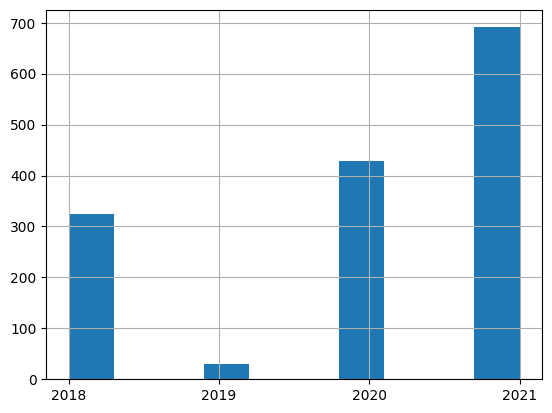

In [102]:
# Univariate analysis for the 'Year' column
year_data = fulldata['Year']
year_data.describe()  # Summary statistics
year_data.value_counts()  # Frequency counts
year_data.hist()  # Histogram

### Explanation 
The univariate analysis on the Year column shows that 2021 has the most 
amount of the data, followed by 2020, 2018, and then 2019. 

UV - 'Company_Brand'

In [103]:
# Univariate analysis for the 'Company_Brand' column
company_data = fulldata['Company_Brand']
company_data.value_counts()  # Frequency counts

Company_Brand
BharatPe               7
Vedantu                6
Spinny                 5
Licious                5
Jumbotail              5
                      ..
Uni                    1
Credit Wise Capital    1
Chargebee              1
Livve                  1
WeRize                 1
Name: count, Length: 1239, dtype: int64

In [104]:
# Univariate analysis for the 'Company_Brand' column by Top 10
company_data = fulldata['Company_Brand']
top_10_companies = company_data.value_counts().head(10)
print(top_10_companies)

Company_Brand
BharatPe         7
Vedantu          6
Spinny           5
Licious          5
Jumbotail        5
Teachmint        4
Infra.Market     4
Captain Fresh    4
Zetwerk          4
Eggoz            4
Name: count, dtype: int64


In [105]:
# Examine the rows for BharatPe for some insights
bharatpe_rows = fulldata[fulldata['Company_Brand'] == 'BharatPe']
print(bharatpe_rows)

     Company_Brand   Sector     Stage    Amount($) HeadQuarter  Year
725       BharatPe  Finance  Series C   75000000.0   New Delhi  2020
850       BharatPe  Finance      Debt   20000000.0   New Delhi  2021
868       BharatPe  Finance  Series E  370000000.0   New Delhi  2021
960       BharatPe  Finance  Series D  100000000.0   New Delhi  2021
997       BharatPe  Finance      Debt    6000000.0   New Delhi  2021
1001      BharatPe  Finance      Debt   10000000.0   New Delhi  2021
1023      BharatPe  Finance      Debt    8200000.0   New Delhi  2021


### Explanation
The univariate analysis on the Company/Brand column shows that BharatPe appeared most in the start-ups that secured funding.

The analysis also shows that BharatPe has its headquarter in New Delhi, and is in the Finance sector. 

The company also received various funding amounts at different stages.

UV - 'HeadQuarter'

In [106]:
# Univariate analysis for the 'HeadQuarter' column
company_data = fulldata['HeadQuarter']
company_data.value_counts()  # Frequency counts

HeadQuarter
Bangalore      527
Mumbai         237
Gurgaon        189
New Delhi      159
Chennai         58
              ... 
Riyadh           1
Seoul            1
Bangkok          1
Bihar            1
Gandhinagar      1
Name: count, Length: 69, dtype: int64

In [107]:
# Univariate analysis for the 'HeadQuarter' column by top 10
company_data = fulldata['HeadQuarter']
top_10_companies = company_data.value_counts().head(10)
print(top_10_companies)

HeadQuarter
Bangalore    527
Mumbai       237
Gurgaon      189
New Delhi    159
Chennai       58
Pune          52
Noida         40
Hyderabad     39
Jaipur        21
Haryana       18
Name: count, dtype: int64


### Explanation
The univariate analysis for the HeadQuarter column shows that startups in Bangalore appeared most in the data. 

This is followed by Mumbai, New Delhi and Gurgaon

UV - 'Sector'

In [108]:
# Univariate analysis for the 'Sector' column
company_data = fulldata['Sector']
company_data.value_counts()  # Frequency counts

Sector
Finance                  281
Technology               232
Commerce                 156
Education                153
Transport                104
Health                    86
Business Intelligence     74
Food & Beverages          68
LifeStyle                 50
Media & Entertainment     49
Agriculture               48
Hospitality               39
Beauty & Fashion          39
Manufacturing             36
Energy                    16
Real Estate               16
Sports                    15
Government                 8
Telecommunications         4
Name: count, dtype: int64

In [109]:
# Univariate analysis for the 'Sector' column by top 10
company_data = fulldata['Sector']
top_10_companies = company_data.value_counts().head(10)
print(top_10_companies)

Sector
Finance                  281
Technology               232
Commerce                 156
Education                153
Transport                104
Health                    86
Business Intelligence     74
Food & Beverages          68
LifeStyle                 50
Media & Entertainment     49
Name: count, dtype: int64


### Explanation 
The univariate analysis for the sector column shows that the Finance sector appeared most in the dataset. 

This is followed by Technology, Commerce and Education 

UV - 'Amount($)'

In [110]:
# Univariate analysis for the 'Amount($)' column
summary_stats = fulldata['Amount($)'].describe()
print(summary_stats)

count    1.474000e+03
mean     1.939695e+07
std      6.151674e+07
min      8.820000e+02
25%      9.738825e+05
50%      3.000000e+06
75%      1.042500e+07
max      1.000000e+09
Name: Amount($), dtype: float64


In [111]:
fulldata['Amount($)'].mean()

19396954.018317502

The figures are too huge, making the explanation difficult. 
We will divide by 1000000 to make the summary statistics easier to read. 

In [112]:
# Divide the 'Amount($)' column by 1,000,000
fulldata['Amount($)'] = fulldata['Amount($)']/10000000

# Calculate summary statistics
amount_stats = fulldata['Amount($)'].describe()
print(amount_stats)

count    1474.000000
mean        1.939695
std         6.151674
min         0.000088
25%         0.097388
50%         0.300000
75%         1.042500
max       100.000000
Name: Amount($), dtype: float64


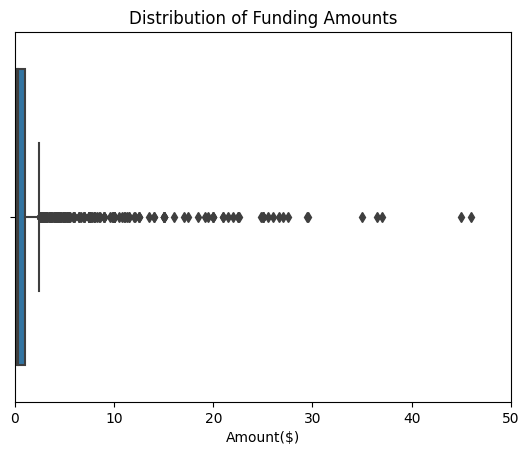

In [113]:
# Distribution of funding amounts using a boxplot
# Create a new Figure and an Axes object
fig, ax = plt.subplots()

# Create the box plot and specify the Axes to use (ax=ax)
sns.boxplot(x=fulldata['Amount($)'], ax=ax)

# Set the x-axis limits on the 'ax' object
ax.set_xlim([0, 50])

# Add labels and title
plt.xlabel('Amount($)')
plt.title('Distribution of Funding Amounts')

# Display the plot
plt.show()

UV - 'Stage'

In [114]:
# Univariate analysis for the 'Sector' column
company_data = fulldata['Stage']
company_data.value_counts()  # Frequency counts

Stage
Pre-series A       766
Series A           275
Series B           127
Series C           107
Debt                57
Series D            51
Series E            29
Angel Round         19
Series F            12
Equity              11
Bridge Round         6
Series H             4
Grant                3
Corporate Round      3
Series G             3
Series I             1
Name: count, dtype: int64

### Explanation 
The univariate analysis on the stage column shows that most of the data on the stage of funding was Pre-series A in the dataset. 

In [115]:
# Univariate analysis for the 'Sector' column by top 10
company_data = fulldata['Stage']
top_10_companies_stage = company_data.value_counts().head(10)
print(top_10_companies)

Sector
Finance                  281
Technology               232
Commerce                 156
Education                153
Transport                104
Health                    86
Business Intelligence     74
Food & Beverages          68
LifeStyle                 50
Media & Entertainment     49
Name: count, dtype: int64


## Multivariate Analysis

### Pairwise correlation matrix of numerical columns (year and Amount)

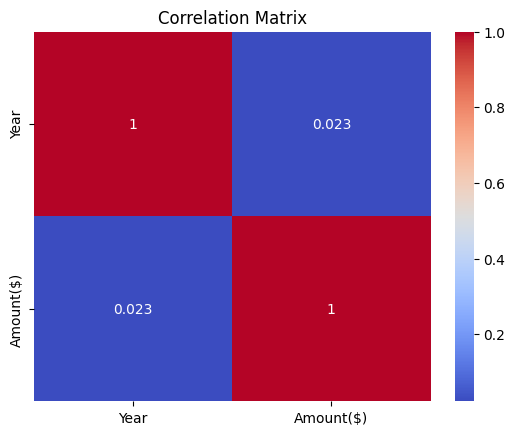

In [116]:
vfulldata = fulldata[['Year','Amount($)']]

# Pairwise correlation matrix
correlation_matrix = vfulldata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Scatter plot: Amount($) by year to compare distribution of amounts across different years

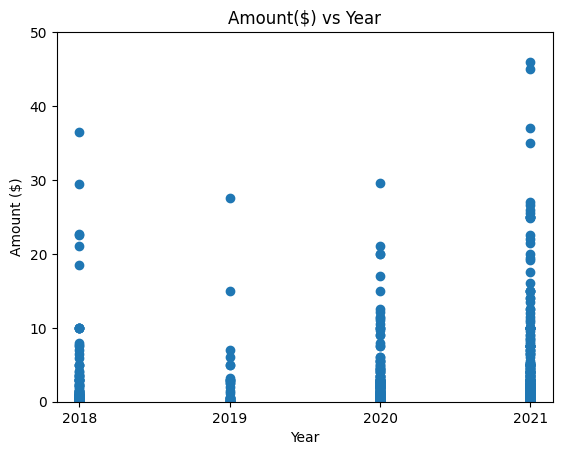

In [117]:
# Create a new Figure and an Axes object
fig, ax = plt.subplots()

# Create the box plot and specify the Axes to use (ax=ax)
plt.scatter(x = fulldata['Year'], y=fulldata['Amount($)'])

# Set the x-axis limits on the 'ax' object
ax.set_ylim([0, 50])

plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.title('Amount($) vs Year')
plt.show()

#### Box plot: Amount($) by Sector to compare distribution of amounts across different sectors

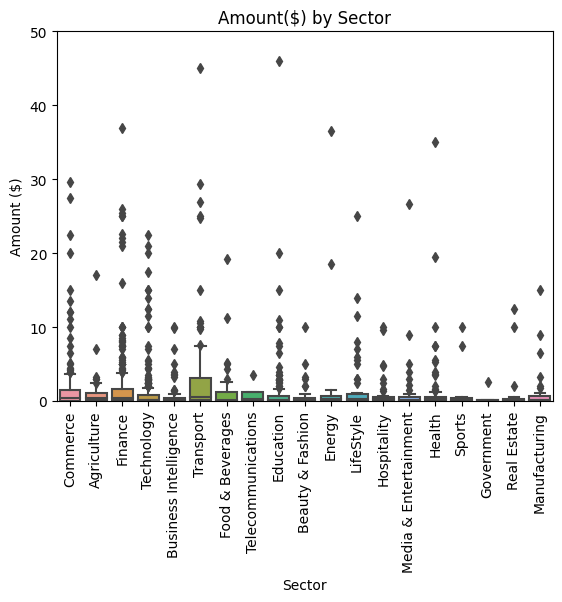

In [118]:
# Create a new Figure and an Axes object
fig, ax = plt.subplots()

# Box plot: Amount($) by Sector
sns.boxplot(x=fulldata['Sector'], y=fulldata['Amount($)'])

# Set the x-axis limits on the 'ax' object
ax.set_ylim([0, 50])

plt.xlabel('Sector')
plt.ylabel('Amount ($)')
plt.title('Amount($) by Sector')
plt.xticks(rotation=90)
plt.show()

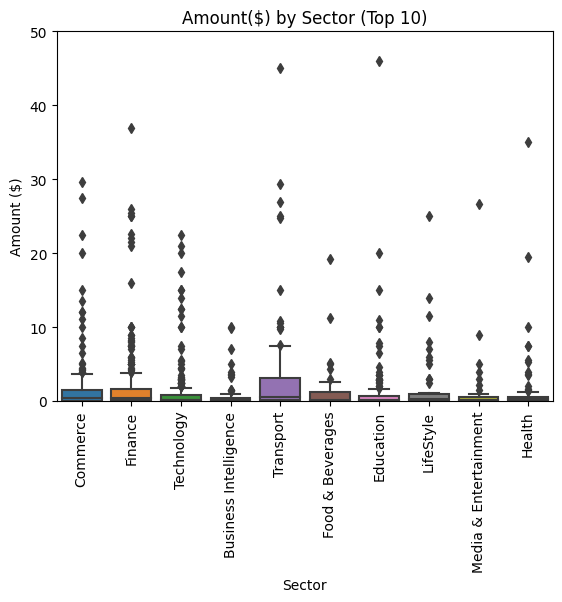

In [119]:
## Box plot: Amount($) by top 10 Sectors  
# Top 10 sectors
top_10_sectors = fulldata['Sector'].value_counts().head(10)

# Filter the dataset for top 10 sectors
filtered_df = fulldata[fulldata['Sector'].isin(top_10_sectors.index)]

# Create a new Figure and an Axes object
fig, ax = plt.subplots()

# Box plot: Amount($) by Sector (Top 10)
sns.boxplot(x=filtered_df['Sector'], y=filtered_df['Amount($)'])

# Set the x-axis limits on the 'ax' object
ax.set_ylim([0, 50])

plt.xlabel('Sector')
plt.ylabel('Amount ($)')
plt.title('Amount($) by Sector (Top 10)')
plt.xticks(rotation=90)
plt.show()

### Bar plot: Funding Stage count

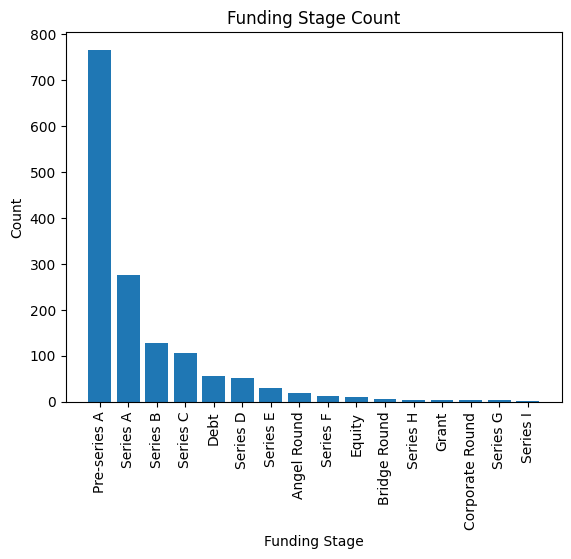

In [120]:
# Bar plot: Funding Stage count
stage_count = fulldata['Stage'].value_counts()
plt.bar(stage_count.index, stage_count.values)
plt.xlabel('Funding Stage')
plt.ylabel('Count')
plt.title('Funding Stage Count')
plt.xticks(rotation=90)
plt.show()

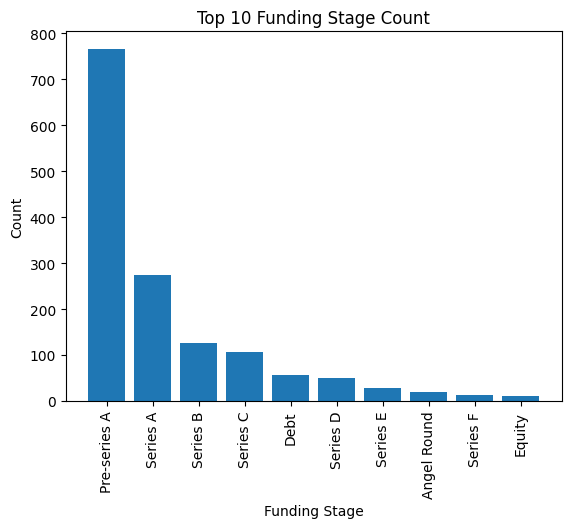

In [121]:
# Bar graph: Top 10 Funding Stage count
plt.bar(top_10_companies_stage.index, top_10_companies_stage.values)
plt.xlabel('Funding Stage')
plt.ylabel('Count')
plt.title('Top 10 Funding Stage Count')
plt.xticks(rotation=90)
plt.show()

### Funding Stage count by Top 10 sectors

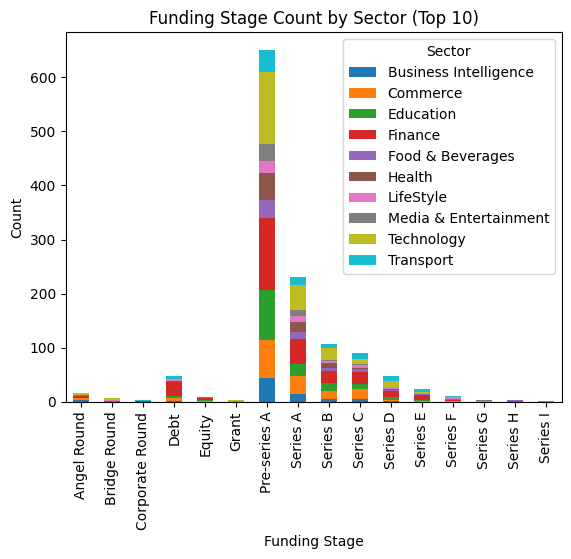

In [122]:
## Funding Stage count by Top 10 sectors
# Top 10 sectors
top_10_sectors = fulldata['Sector'].value_counts().head(10)

# Filter the dataset for top 10 sectors
filtered_df = fulldata[fulldata['Sector'].isin(top_10_sectors.index)]

# Grouped bar plot: Funding Stage count by Sector (Top 10)
grouped_stage_sector = filtered_df.groupby(['Stage', 'Sector']).size().unstack()
grouped_stage_sector.plot(kind='bar', stacked=True)

plt.xlabel('Funding Stage')
plt.ylabel('Count')
plt.title('Funding Stage Count by Sector (Top 10)')
plt.legend(title='Sector', loc='upper right')
plt.show()

The x-axis represents the funding stages, the y-axis represents the count, and each bar is stacked by sector.
The figure shows that EdTech and FinTech were the most funded sectors across the various stages of funding. 

# Hypotheses and Questions

Hypothesis

Null hypothesis: There is no significant relationship between a startup's sector and amount of funding secured.

Alternative hypothesis: There is a significant relationship between a startup's sector and amount of funding secured.

Since there are more than 2 sectors, the ANOVA test would be appropriate to determine if there are significant differences
in the mean funding amounts across sectors

The p-value indicates the probability of observing the data if the null hypothesis (no relationship between sector and funding) is true.
If the p-value is below a predetermined significance level (e.g., 0.05), you can reject the null hypothesis in favor of the alternative 
hypothesis, suggesting a significant relationship between sector and funding.

## ANOVA Test

In [123]:
# Divide the dataset into groups based on the startup's sector
grouped_data = fulldata.groupby('Sector')['Amount($)'].apply(list)

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print the results
print("ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between sector and funding.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between sector and funding.")

ANOVA Test Results:
F-statistic: 0.8667069818668733
p-value: 0.6202441125148725
Fail to reject the null hypothesis. There is no significant relationship between sector and funding.


# Answering the Questions

### 1. Which companies received the highest amount of funding? 


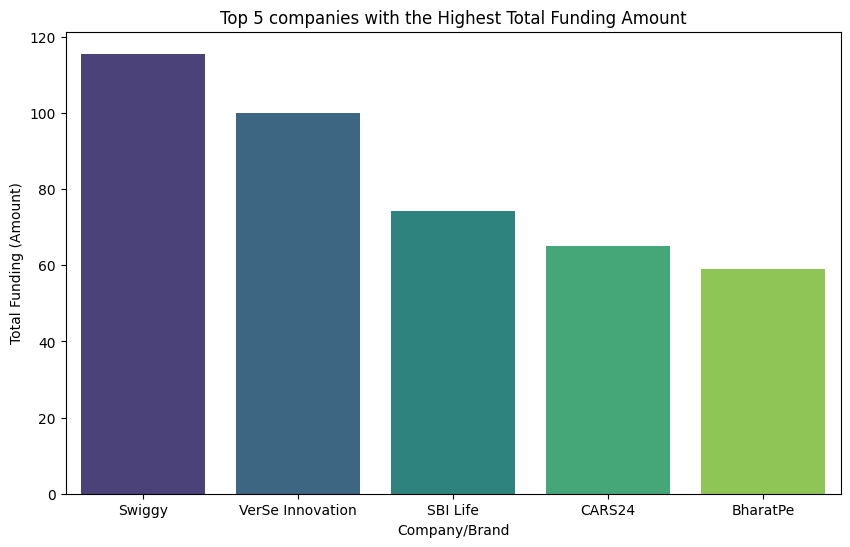

In [124]:
# Group the data by company_brand and calculate the total funding amount
highest_fund_brand = fulldata.groupby('Company_Brand')['Amount($)'].sum()

# Sort the locations by funding amount in descending order
top_10_companies = highest_fund_brand.nlargest(5)

# Plot the total funding amount for the top 10 locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_companies.index, y=top_10_companies.values, palette='viridis')
plt.xlabel('Company/Brand')
plt.ylabel('Total Funding (Amount)')
plt.title('Top 5 companies with the Highest Total Funding Amount')
plt.xticks(rotation=0)

# Display the plot
plt.show()

### 2. What is the trend in startup funding in India over the years?

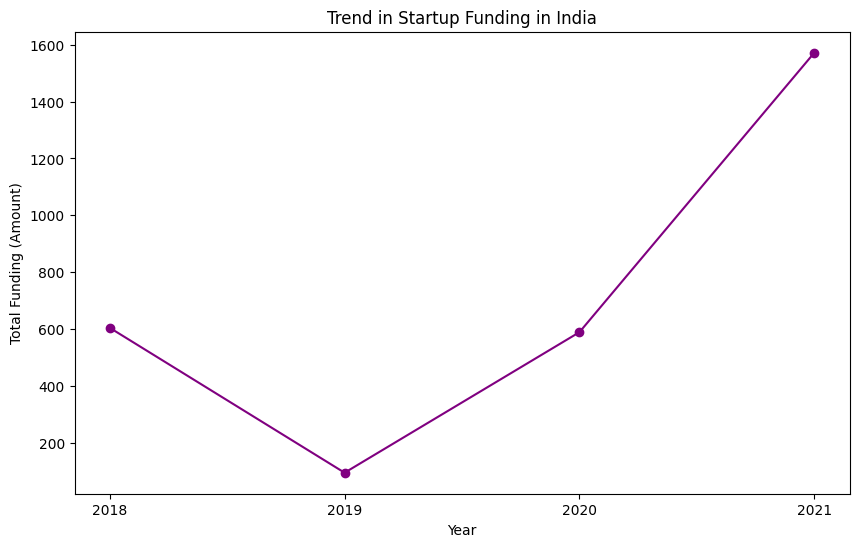

In [125]:
# Plotting a line graph to show the startup funding trends in India across the years (2018-2021)
# Filter the fulldata to include only the needed years
needed_years = ['2018', '2019', '2020', '2021']
filtered_data = fulldata[fulldata['Year'].isin(needed_years)]

# Group the filtered data by year and calculate the total funding amount for each year
funding_by_year = filtered_data.groupby('Year')['Amount($)'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(funding_by_year.index, funding_by_year.values, marker='o', color='purple')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Funding (Amount)')
plt.title('Trend in Startup Funding in India')

# Set the x-axis ticks to only display the needed years
plt.xticks(funding_by_year.index)

# Display the plot
plt.show()

### 3. At what funding stage did investors fund the highest?

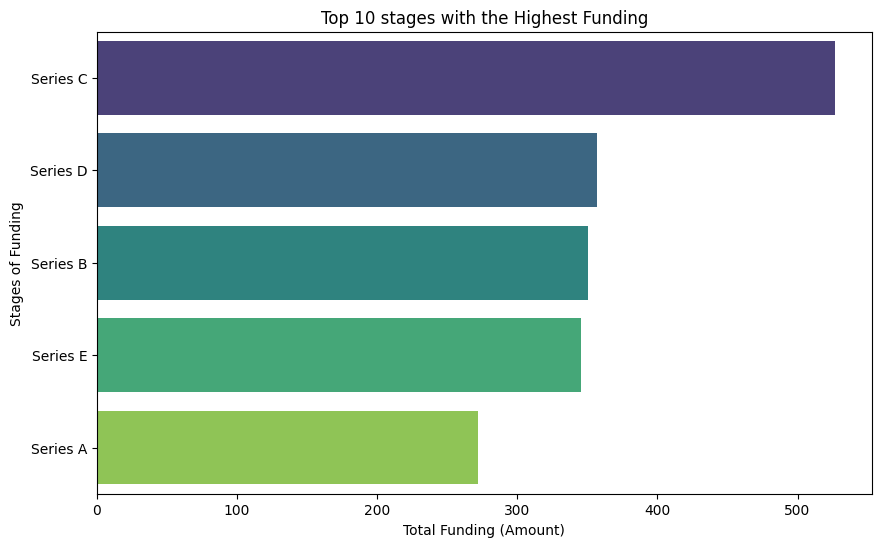

In [126]:
# Group the data by company_brand and calculate the total funding amount
highest_fund_stage = fulldata.groupby('Stage')['Amount($)'].sum()

# Sort the locations by funding amount in descending order
top_10_stages = highest_fund_stage.nlargest(5)

# Plot the total funding amount for the top 10 locations
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_stages.index, x=top_10_stages.values, palette='viridis')
plt.xlabel('Total Funding (Amount)')
plt.ylabel('Stages of Funding')
plt.title('Top 10 stages with the Highest Funding')
plt.xticks(rotation=0)

# Display the plot
plt.show()

### 4. Which cities received the highest amount of funding ?

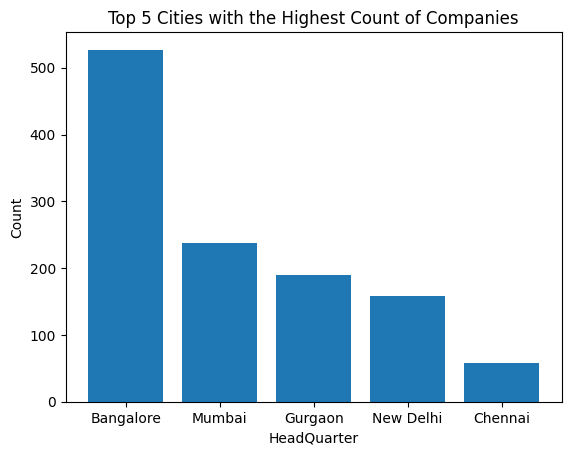

In [127]:
# Do a count of the values for each headquarter in the merged_df
top_5_cities = fulldata['HeadQuarter'].value_counts().head()

# Group the data by company_brand and calculate the total funding amount
highest_fund_stage = fulldata.groupby('HeadQuarter')['Amount($)'].sum()

# Plot the total funding amount for the top 5 cities

plt.bar(top_5_cities.index,top_5_cities.values)
plt.xlabel('HeadQuarter')
plt.ylabel('Count')
plt.title('Top 5 Cities with the Highest Count of Companies')
plt.xticks(rotation=0)

# Display the plot
plt.show()

### 5. Which sectors received the highest amount of funding? 

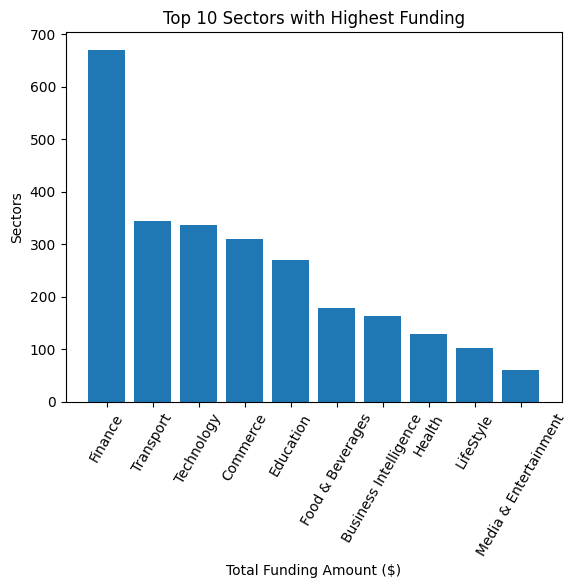

In [128]:
# Plotting a vertical bar graph showing the total funding amount for the top 10 sectors/industries in the Indian startup ecosystem.

# Calculate the total funding amount per sector by grouping the data based on the 'Sector' column and then summing the 'Amount($)' column. 
# .head(10) sorts the sectors in descending order and displays the top 10 sectors with the highest funding amount.
top_10_sectors = fulldata.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).head(10)

plt.bar(top_10_sectors.index,top_10_sectors.values)
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Sectors')
plt.title('Top 10 Sectors with Highest Funding')
plt.xticks(rotation=60)

# Display the plot
plt.show()

### Conclusion

The Indian startup ecosystem offers immense opportunities for entrepreneurs seeking funding to realize their innovative ideas. By analyzing the funding trends and factors influencing success, we have gained valuable insights to enhance our chances of securing funding for our startup. Understanding the sectors and cities that attract significant investments and being aware of the market dynamics will guide our decision-making process.